In [1]:
# a) Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
# b) Read data
df = pd.read_csv("/content/sample_data/housing-1.csv")

In [3]:
# c) Find the shape of the data
df.shape

(20640, 10)

In [4]:
# d) Find the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [6]:
# e) Find whether the dataset has any missing values
df.isnull().sum() # The total_bedrooms column appears to have 207 missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

The 'total_bedrooms' column has 207 missing values. We have to address this since the kmeans algorithm cannot accept empty values. Either I have to drop those observations/rows or impute a value. Imputing with 0 makes no sense conceptually since a house must have a bedroom. **Hence, I will impute with the column mean.**

In [7]:
# Fill empty values with mean value (mean imputation).
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

In [8]:
# f) Describe the  dataset
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
# g) Drop ocean proximity column
Y = df['ocean_proximity']
X = df.copy()
X.drop('ocean_proximity', axis=1, inplace=True)

# Choose ocean_proximity as Y variable

In [10]:
# h) Find if there are unique values in the remaining columns
X.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1924
population             3888
households             1815
median_income         12928
median_house_value     3842
dtype: int64

In [11]:
# i) If any col holds object datatype, transform the data into integer type by implementing label-encoder
Y = LabelEncoder().fit_transform(Y)

In [12]:
# j) If you have implemented label encoder test, whether all the cols now have int data types
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


In [13]:
# k) Scale data with min max scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [14]:
# l) Implement K-means without elbow method, choose your own cluster numbers and find the cluster center points
kmeansModel = KMeans(n_clusters = 5, random_state = 0)
kmeansModel.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=0)

In [15]:
# Find the cluster center points
kmeansModel.cluster_centers_

array([[0.65680993, 0.13402166, 0.30918358, 0.09425679, 0.1170518 ,
        0.05517006, 0.11300173, 0.24017225, 0.36675408],
       [0.29221156, 0.5831316 , 0.34091342, 0.07558329, 0.09079067,
        0.04243757, 0.08867302, 0.21203712, 0.29260829],
       [0.62155157, 0.15724868, 0.70497276, 0.04693399, 0.06542621,
        0.03560911, 0.06564672, 0.18340155, 0.31772912],
       [0.46982625, 0.28011276, 0.61485372, 0.07323973, 0.07775181,
        0.03271529, 0.07771089, 0.42169187, 0.87381826],
       [0.2407241 , 0.57222594, 0.794167  , 0.04807384, 0.06241421,
        0.02845753, 0.06220665, 0.19103331, 0.34667214]])

In [16]:
# m) Find inertia, labels and accuracy score
print("Inertia: ", kmeansModel.inertia_)
print("Labels: ", kmeansModel.labels_)

# Get labels
labels = kmeansModel.labels_

# Get accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy Score: ", accuracy_score(Y, labels))

# Another way to get accuracy
correctLabels = sum(Y == labels)
n = len(Y)
accuracy = correctLabels / n
print("Accuracy Score: ", accuracy)

Inertia:  1856.0649875606202
Labels:  [3 3 4 ... 1 1 1]
Accuracy Score:  0.3003875968992248
Accuracy Score:  0.3003875968992248


**n) Justify why you need to implement elbow method by taking the values of inertia, labels and accuracy score**

We need to implement the elbow method to determine the optimal number of clusters used in our kmeans algorithm. Currently, we have arbitrarily chosen 5 as the ideal number of clusters in our kmeans algorithm. However, this was chosen as a rule of thumb, and based on on the information given by inertia, labels, and accuracy metrics, we should find a different number.

The inertia tells us how far our data is from the cluster centroids - the current number, ~1856, seems to be quite high. The labels themselves are summarized by the accuracy score, which tells us how accurate our algorithm was on predicting the correct label. The accuracy score stands at 0.30, or ~30%, which is quite low and indicates that the model is not performant.

Hence, we should see if there is a better number of clusters for the data using the elbow method.



In [17]:
# o) Implement elbow method for finding the optimal cluster
modelInertia = []
for i in range(1, 11):
    kmeansModel = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeansModel.fit(X)
    modelInertia.append(kmeansModel.inertia_)

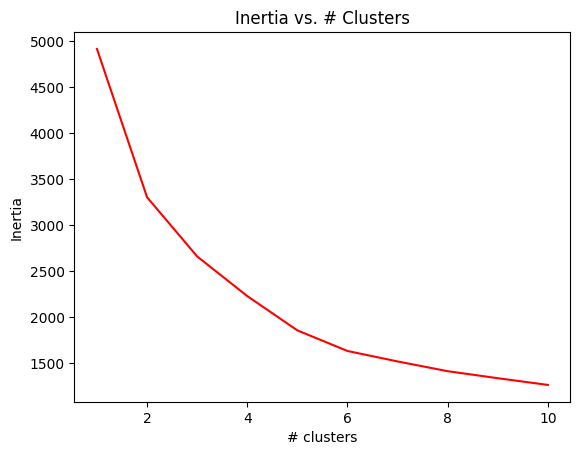

In [18]:
plt.plot(range(1, 11), modelInertia, color = 'red')
plt.title('Inertia vs. # Clusters')
plt.xlabel('# clusters')
plt.ylabel('Inertia')
plt.show()

There does not appear to be an elbow point, or at least one that stands out as much as previous examples. However, the greatest drop in inertia is at k=2, with all following cluster sizes having diminishing returns in terms of algorithm inertia. We will test from 2-6 clusters and examine their accuracy to find the optimal cluster number.

In [19]:
# Run kmeans with 2 clusters
kmeansModel = KMeans(n_clusters = 2, random_state = 0)
kmeansModel.fit(X)
labels = kmeansModel.labels_
correctLabels = sum(Y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correctLabels, len(Y)))
print("Accuracy Score: ", accuracy_score(Y, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Result: 11663 out of 20640 samples were correctly labeled.
Accuracy Score:  0.5650678294573643


In [20]:
# Run kmeans with 3 clusters
kmeansModel = KMeans(n_clusters = 3, random_state = 0)
kmeansModel.fit(X)
labels = kmeansModel.labels_
correctLabels = sum(Y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correctLabels, len(Y)))
print("Accuracy Score: ", accuracy_score(Y, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Result: 4112 out of 20640 samples were correctly labeled.
Accuracy Score:  0.1992248062015504


In [21]:
# Run kmeans with 4 clusters
kmeansModel = KMeans(n_clusters = 4, random_state = 0)
kmeansModel.fit(X)
labels = kmeansModel.labels_
correctLabels = sum(Y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correctLabels, len(Y)))
print("Accuracy Score: ", accuracy_score(Y, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Result: 5299 out of 20640 samples were correctly labeled.
Accuracy Score:  0.256734496124031


In [22]:
# Run kmeans with 5 clusters
kmeansModel = KMeans(n_clusters = 5, random_state = 0)
kmeansModel.fit(X)
labels = kmeansModel.labels_
correctLabels = sum(Y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correctLabels, len(Y)))
print("Accuracy Score: ", accuracy_score(Y, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Result: 6200 out of 20640 samples were correctly labeled.
Accuracy Score:  0.3003875968992248


In [23]:
# Run kmeans with 6 clusters
kmeansModel = KMeans(n_clusters = 6, random_state = 0)
kmeansModel.fit(X)
labels = kmeansModel.labels_
correctLabels = sum(Y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correctLabels, len(Y)))
print("Accuracy Score: ", accuracy_score(Y, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Result: 2204 out of 20640 samples were correctly labeled.
Accuracy Score:  0.10678294573643411


In [24]:
# See what unique values are inside of the Y variable and their frequency
np.unique(Y, return_counts=True) # It appears that there are 2 very common labels,
# which might be overshadowing the other categories and driving down accuracy when
# there are greater than 2 clusters.


(array([0, 1, 2, 3, 4]), array([9136, 6551,    5, 2290, 2658]))

**p) Which one is the optimal cluster, justify your answer.**

The optimal number of clusters for the kmeans algorith is k=2 (or, 2 clusters). This might seem like a small number, especially when there are 5 total categories in the Y variable, but the results are much greater than iterations with a higher k.

When k=2, we find that the model correctly predicts 11663 out of 20640 samples, and has an accuracy score of 0.565. All higher-k models have a lower accuracy rate and predict fewer labels correctly. Hence, we should choose k=2 for our kmeans model.